In [1]:
1+1

2

In [2]:
### Build A Basic Chatbot with Langgraph APi(Graph Api)

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages # reducer


In [3]:
class State(TypedDict):
    # Messages have the type list. the add_messages function
    # in the annotation defines how this state key should be updated
    # (in this ccase, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list, add_messages]


In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
GROQ_API_KEY = os.getenv('GROQ_API_KEY')

In [6]:
from langchain_groq import ChatGroq

llm = ChatGroq(model = 'qwen/qwen3-32b', )
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x00000213D51C3890>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000213D534C4D0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
# Another way to create the model.

# from langchain.chat_models import init_chat_model # another way
# llm = init_chat_model('groq:qwen/qwen3-32b')
# llm

In [8]:
# Node functionality
def chatbot(state: State):
    return {
        'messages':[
            llm.invoke(state['messages'])
        ]
    }

In [9]:
graph_builder = StateGraph(State)
graph_builder.add_node('llmchatbot', chatbot)

graph_builder.add_edge(START, 'llmchatbot')
graph_builder.add_edge('llmchatbot', END)
graph = graph_builder.compile()

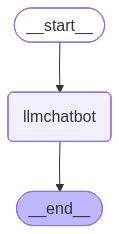

In [10]:
graph

In [11]:
graph.invoke({
    'messages': 'hi'
})

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='28ae09d1-5161-4e58-8f28-1e6d487f2f8b'),
  AIMessage(content='<think>\nOkay, the user said "hi". That\'s a greeting. I should respond in a friendly and welcoming way. Maybe ask how I can assist them today. Keep it simple and open-ended to encourage them to share what they need help with. Let me make sure the tone is positive and approachable.\n</think>\n\nHi! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 9, 'total_tokens': 86, 'completion_time': 0.164088543, 'completion_tokens_details': None, 'prompt_time': 0.000188717, 'prompt_tokens_details': None, 'queue_time': 0.160500732, 'total_time': 0.16427726}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_2bfcc54d36', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c23c8-90bc-75d1-b031-f24ecdd706

In [12]:
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [13]:
from langchain_tavily import  TavilySearch
tool = TavilySearch(max_results=3)
tool.invoke("What is the weather like today?")


{'query': 'What is the weather like today?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Weather in current location',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Current', 'region': 'Harbour Island', 'country': 'Bahamas', 'lat': 25.4333, 'lon': -76.7833, 'tz_id': 'America/Nassau', 'localtime_epoch': 1770126854, 'localtime': '2026-02-03 08:54'}, 'current': {'last_updated_epoch': 1770126300, 'last_updated': '2026-02-03 08:45', 'temp_c': 18.6, 'temp_f': 65.6, 'is_day': 1, 'condition': {'text': 'Patchy rain nearby', 'icon': '//cdn.weatherapi.com/weather/64x64/day/176.png', 'code': 1063}, 'wind_mph': 14.1, 'wind_kph': 22.7, 'wind_degree': 54, 'wind_dir': 'NE', 'pressure_mb': 1026.0, 'pressure_in': 30.29, 'precip_mm': 0.01, 'precip_in': 0.0, 'humidity': 58, 'cloud': 100, 'feelslike_c': 18.6, 'feelslike_f': 65.6, 'windchill_c': 18.6, 'windchill_f': 65.6, 'heatindex_c': 18.6, 'heatindex_f': 65.6, 'dewpoint_c': 10.1, 

In [14]:
## Custom Function the fuctions need docstring so that llm can use the correct tool.
def multiply(a: int, b : int) -> int:
    """
    Multiply a and b.

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a * b


In [15]:
tools = [tool,multiply]


In [16]:
llm_with_tools = llm.bind_tools(tools)

In [17]:
llm_with_tools

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x00000213D51C3890>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000213D534C4D0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be

In [18]:
# Stategraph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

# Node definition

def tool_calling_llm(state: State):
    response = llm.invoke(state['messages'])
    return {"messages":[response]}


# Graph
builder = StateGraph(State)
builder.add_node('tool_calling_llm', tool_calling_llm)
builder.add_node("tools", ToolNode(tools))


# edges
builder.add_edge(START, 'tool_calling_llm')
builder.add_conditional_edges(
    'tool_calling_llm',
    tools_condition
)
builder.add_edge('tools', END)

graph = builder.compile()


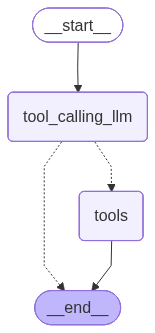

In [19]:
graph

In [20]:
response = graph.invoke({'messages': 'what is recent ai news'})

In [21]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is recent ai news
================================== Ai Message ==================================

<think>
Okay, so I need to figure out what the recent AI news is. Let me start by recalling what I know about AI. There's been a lot of developments in the past year, especially around large language models, generative AI, and maybe some regulatory actions. Let me break this down into categories.

First, there's the advancement in AI models. I remember that OpenAI released GPT-4, right? That's a big deal because it's more powerful than previous versions. Then there's Google's Gemini models, which they've been promoting as their next-gen AI. Maybe they have different versions for different use cases. Anthropic might have released a new version of their Claude model as well. I should check if these are recent, like in 2023 or early 2024.

Next, generative AI has been expanding into more areas. I've heard

In [22]:
response = graph.invoke({'messages': 'give me ai newys and then multiple 5 and 10'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

give me ai newys and then multiple 5 and 10
================================== Ai Message ==================================

<think>
Okay, the user asked for "ai newys" and then to multiply 5 and 10. Let me break this down. First, "ai newys" probably has a typo. They might have meant "AI news" and "new AI news" or something like that. Maybe they wanted recent updates in artificial intelligence. Then, the second part is straightforward math: 5 multiplied by 10.

So, I need to first address the AI news part. Let me think about recent developments in AI. There's been a lot going on. Maybe talk about advancements in large language models, like GPT-4 or other models from different companies. Also, AI in healthcare, such as new diagnostic tools. Autonomous vehicles might be another area. Plus, ethical considerations and regulations being discussed more now.

Wait, the user might not know all the specifics, so 

In [23]:
### ReAct Agent

# Node definition

def tool_calling_llm(state: State):
    response = llm.invoke(state['messages'])
    return {"messages":[response]}


# Graph
builder = StateGraph(State)
builder.add_node('tool_calling_llm', tool_calling_llm)
builder.add_node("tools", ToolNode(tools))


# edges
builder.add_edge(START, 'tool_calling_llm')
builder.add_conditional_edges(
    'tool_calling_llm',
    tools_condition
)
builder.add_edge('tools', 'tool_calling_llm')
builder.add_edge('tool_calling_llm', END)

graph = builder.compile()


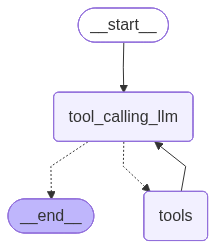

In [24]:
graph

In [25]:
response = graph.invoke({'messages': 'give me ai newys and then multiple 5 and 10'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

give me ai newys and then multiple 5 and 10
================================== Ai Message ==================================

<think>
Okay, the user wants me to first give them AI news and then multiply 5 and 10. Let me start with the AI news. I should look up the latest developments in AI from reliable sources. Maybe there's a breakthrough in natural language processing or a new AI model released. I remember reading about Google's Gemini model being updated recently. Also, there's been talk about AI in healthcare, like new diagnostic tools. I should mention those. Then, for the math part, multiplying 5 by 10 is straightforward. Wait, the user said "multiple 5 and 10," which could mean multiplying them. 5 times 10 is 50. But maybe they meant something else? No, probably just the multiplication. Let me confirm that. Yeah, the answer is 50. I need to present both parts clearly. First the news, then the calc

- Adding Memory In Agentic Graph.
- currently the Ai cannot remember the previous conversation.
- for example, if i provide my name and then in the next invoke(), i ask my name, it will say i dont know/

In [26]:
response = graph.invoke({'messages': 'Hi, my name is X'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, my name is X
================================== Ai Message ==================================

<think>
Okay, the user started with "Hi, my name is X" and the assistant responded with a greeting. Now the user is responding with "Okay, the user started with 'Hi, my name is X' and the assistant responded with a greeting. Now the user is responding with..." Wait, this seems a bit confusing. Maybe there's a mistake in the message. Let me check again.

The user's original message is "Hi, my name is X" and the assistant's response is "Hi X! Nice to meet you. How can I assist you today?" Then the user is replying with "Okay, the user started with..." but that seems like the user is actually describing the conversation flow instead of continuing it. Perhaps the user is testing if the assistant can handle a meta-conversation or there's a formatting error. Alternatively, maybe the user is trying to provide an ex

In [27]:
response = graph.invoke({'messages': 'What is my name?'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

<think>
Okay, the user is asking, "What is my name?" Hmm, but I don't have access to their personal information, right? I should check the conversation history to see if they've mentioned their name before. Let me look... No, there's no prior messages here. So I can't know their name unless they tell me.

Wait, maybe they're testing if I can figure it out somehow. But the user hasn't provided any context or hints. I need to make sure I don't assume anything. My response should be polite and let them know I can't access that information. Also, maybe ask them to provide their name if they want me to use it in the conversation. But I should avoid making it feel like I have access. Keep it simple and clear.
</think>

I don't have access to personal information about users, and I can't determine your name. If you

- to keep track of the conversation history, we use memory.
- there are different types of memory, such as:
    - buffer memory
    - summary memory
    - conversation summary memory
    - conversation summary buffer memory
- in langgraph, we can create a checkpoint to save the state of the graph.
- we can use the checkpoint to restore the state of the graph.
- we can use the checkpoint to resume the graph from where it left off.

In [28]:
### ReAct Agent with memory
from langgraph.checkpoint.memory import MemorySaver

# This is a simple memory saver that saves the state of the graph in memory using defaultdict.
memory = MemorySaver()


def tool_calling_llm(state: State):
    response = llm.invoke(state['messages'])
    return {"messages":[response]}


# Graph
builder = StateGraph(State)
builder.add_node('tool_calling_llm', tool_calling_llm)
builder.add_node("tools", ToolNode(tools))


# edges
builder.add_edge(START, 'tool_calling_llm')
builder.add_conditional_edges(
    'tool_calling_llm',
    tools_condition
)
builder.add_edge('tools', 'tool_calling_llm')
builder.add_edge('tool_calling_llm', END)

graph = builder.compile(checkpointer=memory)


- To save the conversation of a specific user, we need to create and use thread id

In [29]:
config = {
    'configurable': {
        'thread_id': '1'
    }
}

In [30]:
response = graph.invoke(
    {
        'messages': 'Hi, my name is X'
    },
    config=config
)

for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, my name is X
================================== Ai Message ==================================

<think>
Okay, the user greeted me with Hello, my name is X. I need to respond appropriately. First, I should acknowledge their greeting and welcome them. Then, according to the previous instructions, I should ask them what I can help with. Keep the tone friendly and open to encourage them to ask questions or get help. Make sure the response is concise but not too short, and avoid any markdown formatting. Alright, let's put this together.
</think>

Hello X! Welcome. How can I assist you today? Feel free to ask any questions or let me know if you need help with something specific. 😊


In [31]:
response = graph.invoke(
    {
        'messages': 'do you remember my name?'
    },
    config=config
)

for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, my name is X
================================== Ai Message ==================================

<think>
Okay, the user greeted me with Hello, my name is X. I need to respond appropriately. First, I should acknowledge their greeting and welcome them. Then, according to the previous instructions, I should ask them what I can help with. Keep the tone friendly and open to encourage them to ask questions or get help. Make sure the response is concise but not too short, and avoid any markdown formatting. Alright, let's put this together.
</think>

Hello X! Welcome. How can I assist you today? Feel free to ask any questions or let me know if you need help with something specific. 😊
================================ Human Message =================================

do you remember my name?
================================== Ai Message ==================================

<think>
Okay, the user asked, "do you reme

# Streaming in langgraph


In [34]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()


In [62]:
def superbot(state:State):
    return {"messages": [llm.invoke(state['messages'])]}


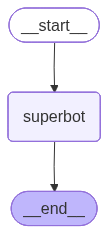

In [63]:
graph= StateGraph(State)

graph.add_node('superbot', superbot)

graph.add_edge(START, 'superbot')
graph.add_edge('superbot', END)

graph_builder = graph.compile(checkpointer=memory)

graph_builder


In [64]:
config = {
    'configurable': {
        'thread_id': '1'
    }

}

response = graph_builder.invoke({
    "messages": "Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play"
}, config=config)
response

{'messages': [HumanMessage(content='Hi, my name is X and i like video games', additional_kwargs={}, response_metadata={}, id='30eb281a-646a-4b48-a53d-9e10d7b35589'),
  HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='6530d442-730f-4bfd-a8ed-5fbff13cf571'),
  HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='a3ead787-70f9-414f-a419-9821c5b9f95a'),
  AIMessage(content='<think>\nOkay, let\'s see. The user mentioned they like video games and want to know about the latest AAA titles. I need to provide an up-to-date list. First, I should recall the major releases in the past few months. 2023 had several big titles. The user might be looking for both 2023 and 2024 releases.\n\nStarting with 2023, there\'s Baldur\'s Gate 3 from Larian Studios. That was a huge success and a ful

# Streaming:
- Methods: .stream() and .astream()
    - These methods are sync and async method for streaming the response.
- Additional Params:
    - values: This streams the full state of the graph after each node is called.
    - updates: This streams updates to the state of the graph after each node is called.
   

In [65]:
config = {
    "configurable": {
        "thread_id": "5"
    }
}
data = graph_builder.stream({"messages": "Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play"}, config=config, stream_mode="values")

In [66]:
list(data)

[{'messages': [HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='a4c375cc-5a07-4ba3-9715-eaf495dce93d'),
   HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='8a2feeec-6dd8-4a1f-98cd-2883834aeb25')]},
 {'messages': [HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='a4c375cc-5a07-4ba3-9715-eaf495dce93d'),
   HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='8a2feeec-6dd8-4a1f-98cd-2883834aeb25'),
   AIMessage(content="<think>\nOkay, the user introduced themselves as X and mentioned they like video games. They want to know about the latest AAA titles to pla

In [67]:


data = list(graph_builder.stream({"messages": "Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play"}, config=config, stream_mode="updates"))


In [68]:
data

[{'superbot': {'messages': [AIMessage(content='<think>\nOkay, the user just asked again about the latest AAA titles they can play. Let me check the history to avoid repeating the same information. The previous response from April 2024 listed titles like Final Fantasy VII Rebirth, The Callisto Protocol, Starfield, and others. Since the user is asking again now, I need to update the information with any new releases from 2024 and beyond.\n\nFirst, I should check for any major AAA games released in Q3 2024 or early Q4 2024. Let me think: The user might be looking for games that came out after the initial list. For example, games like "The Day Before" or "Final Fantasy XVI" were mentioned in the previous response, but maybe there are newer ones. Wait, "Final Fantasy VII Rebirth" was mentioned as a 2024 release, but it actually launched in February 2024. So that\'s still recent. However, any updates or DLCs for it? Not sure. \n\nAlso, consider the platform differences. The user might be on 

In [69]:
config = {
    "configurable": {
        "thread_id": "6"
    }
}
data = graph_builder.stream({"messages": "Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play"}, config=config, stream_mode="updates")

In [71]:
for chunk in data:
    print(chunk)

{'superbot': {'messages': [AIMessage(content='<think>\nOkay, the user is X and likes video games. They want to know about the latest AAA titles they can play. Let me start by recalling the major releases from 2023 and early 2024. AAA games are usually big budget, high-profile titles from major studios. \n\nFirst, I should consider the platforms. The user didn\'t specify if they play on PC, PlayStation, Xbox, or Nintendo Switch, so I should mention which platforms each game is available on. That way, they can see which ones are relevant to them.\n\nNew 2023 releases include games like "Starfield" from Bethesda, which is a big open-world RPG set in space. It\'s for PC, Xbox Series X/S, and PlayStation 5. Then there\'s "Final Fantasy XVI" for PS5, a new entry in the Final Fantasy series known for its story and visuals. "Baldur\'s Gate 3" is another major release, a CRPG with a lot of depth and co-op options, also on PC and PS5.\n\nIn early 2024, "The Day Before" was released as an open-wo

In [72]:
for chunk in graph_builder.stream({"messages": "I like action games and racing games"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='fea6102f-d885-4a9a-9a5c-f70191a2875c'), AIMessage(content='<think>\nOkay, the user is X and likes video games. They want to know about the latest AAA titles they can play. Let me start by recalling the major releases from 2023 and early 2024. AAA games are usually big budget, high-profile titles from major studios. \n\nFirst, I should consider the platforms. The user didn\'t specify if they play on PC, PlayStation, Xbox, or Nintendo Switch, so I should mention which platforms each game is available on. That way, they can see which ones are relevant to them.\n\nNew 2023 releases include games like "Starfield" from Bethesda, which is a big open-world RPG set in space. It\'s for PC, Xbox Series X/S, and PlayStation 5. Then there\'s "Final Fantasy XVI" for PS5, a new entry in the Final Fantasy series known for its stor

# astream_events method
- gives a lot more info. 
- can be used for debugging stuff

In [73]:
config = {
    "configurable": {
        "thread_id": "6"
    }
}
async for event in graph_builder.astream_events({"messages": "Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play"}, config=config, stream_mode="updates"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '019c2452-9b5c-7af3-b87e-e918aa01c951', 'metadata': {'thread_id': '6'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, my name is X and i like video games. Tell me about the latest AAA titles i can play', additional_kwargs={}, response_metadata={}, id='fea6102f-d885-4a9a-9a5c-f70191a2875c'), AIMessage(content='<think>\nOkay, the user is X and likes video games. They want to know about the latest AAA titles they can play. Let me start by recalling the major releases from 2023 and early 2024. AAA games are usually big budget, high-profile titles from major studios. \n\nFirst, I should consider the platforms. The user didn\'t specify if they play on PC, PlayStation, Xbox, or Nintendo Switch, so I should mention which platforms each game is a